In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import os
import matplotlib.style as style

### San Francisco Airbnb Data

Observations: 
1. Entire House/Apartment Airbnb listings have the highest average revenue and lowest vacancy compared to Private and Shared Rooms
2. There is no strong correlation between number of reviews and average rate/price per night
3. Shared Rooms had the highest vacancy and, therefore, lowest bookings as compared to Private Rooms & Entire House/Apartments

In [2]:
airbnb_data = "resources/sfairbnb.csv"

In [3]:
sf_airbnb_df = pd.read_csv(airbnb_data)

In [4]:
sf_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,194,5/31/2019,1.60,1,92
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,126,7/4/2019,1.04,3,68
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,8/6/2017,0.90,1,0
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,17,11/21/2016,0.14,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9/12/2018,0.14,9,338


In [38]:
nRowsRead = None # specify 'None' if want to read whole file

df1 = pd.read_csv('resources/sfairbnb.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'resources/sfairbnb.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7738 rows and 16 columns


I attempted to do a 'drop_na' on my sf_airbnb_df but it deleted all of my data since every column has blank information. Therefore, I selected the data I wanted using the following code

In [5]:
sf_airbnb_df[['price', 'availability_365', 'number_of_reviews']].describe()

,price,availability_365,number_of_reviews
count,7738.000000,7738.000000,7738.000000
mean,216.251486,153.019643,44.035022
std,280.334610,129.534341,75.385010
min,0.000000,0.000000,0.000000
25%,100.000000,25.000000,1.000000
50%,152.000000,129.000000,11.000000
75%,249.000000,290.000000,53.000000
max,9999.000000,365.000000,724.000000


In [6]:
sf_airbnb_df[["neighbourhood", "room_type", "price", "latitude", 'longitude', 'number_of_reviews']].head().round(decimals=2)

,neighbourhood,room_type,price,latitude,longitude,number_of_reviews
0,Western Addition,Entire home/apt,170,37.77,-122.43,194
1,Inner Sunset,Private room,99,37.75,-122.46,126
2,Bernal Heights,Entire home/apt,235,37.75,-122.42,111
3,Haight Ashbury,Private room,65,37.77,-122.45,17
4,Haight Ashbury,Private room,65,37.76,-122.45,8


In [7]:
room_type = pd.DataFrame(sf_airbnb_df.groupby(['room_type']).mean()['availability_365'])
room_type

,availability_365
room_type,
Entire home/apt,156.718478
Private room,141.337607
Shared room,220.894273


In [8]:
avg_price = pd.DataFrame(sf_airbnb_df.groupby(['room_type']).mean()['price'])
avg_price.head()

,price
room_type,
Entire home/apt,267.234106
Private room,141.534900
Shared room,84.237885


In [9]:
# Combine the data into a single dataset
merge_df = pd.merge(room_type, avg_price, on='room_type', how='left')
# Display the data table for preview
merge_df.head()

,availability_365,price
room_type,,
Entire home/apt,156.718478,267.234106
Private room,141.337607,141.534900
Shared room,220.894273,84.237885


In [10]:
merge_df['Days Booked'] = 365-merge_df['availability_365']
merge_df

,availability_365,price,Days Booked
room_type,,,
Entire home/apt,156.718478,267.234106,208.281522
Private room,141.337607,141.534900,223.662393
Shared room,220.894273,84.237885,144.105727


In [11]:
# This calculates total revenue by room_type
merge_df['Total Revenue'] = merge_df['Days Booked'] * merge_df['price']
merge_df.reset_index()

,room_type,availability_365,price,Days Booked,Total Revenue
0,Entire home/apt,156.718478,267.234106,208.281522,55659.926421
1,Private room,141.337607,141.534900,223.662393,31656.034514
2,Shared room,220.894273,84.237885,144.105727,12139.161715


In [12]:
# Optional: Data Frame with optional formatting
merge_df.style.format({"availability_365": "{:,.2f}", "price": "${:,.2f}", "Days Booked": "{:.2f}", "Total Revenue": "${:,.2f}"})

,availability_365,price,Days Booked,Total Revenue
room_type,,,,
Entire home/apt,156.72,$267.23,208.28,"$55,659.93"
Private room,141.34,$141.53,223.66,"$31,656.03"
Shared room,220.89,$84.24,144.11,"$12,139.16"


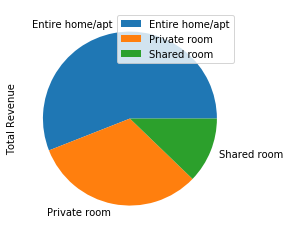

In [13]:
merge_df.plot.pie(y='Total Revenue')

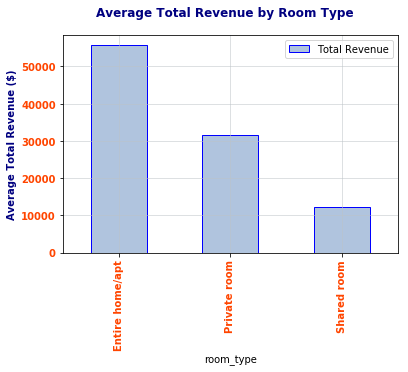

In [14]:
merge_df.plot.bar(y='Total Revenue', color='lightsteelblue', edgecolor='blue')

# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Average Total Revenue by Room Type', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Average Total Revenue ($)", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("AvgRevenuebyRoom.png", bbox_inches="tight", transparent=True)

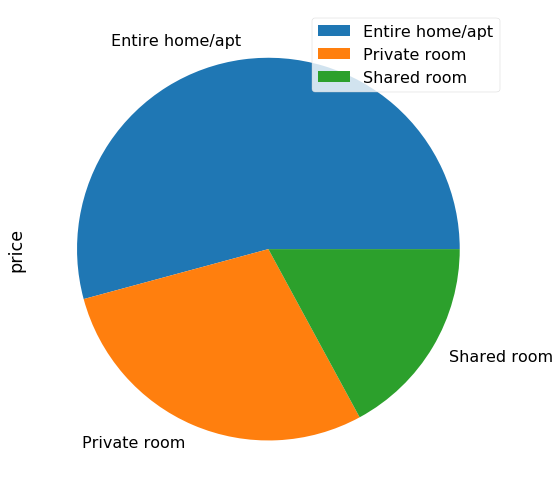

In [15]:
merge_df.plot.pie(y='price')

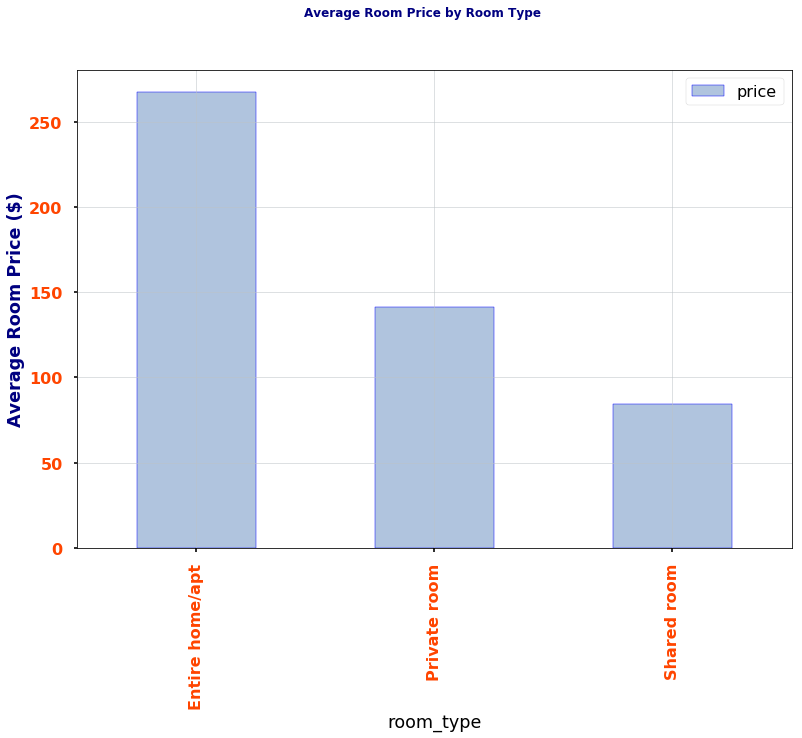

In [16]:
merge_df.plot.bar(y='price', color='lightsteelblue', edgecolor='blue')

# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Average Room Price by Room Type', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Average Room Price ($)", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("AvgRoomPricebyRoom.png", bbox_inches="tight", transparent=True)

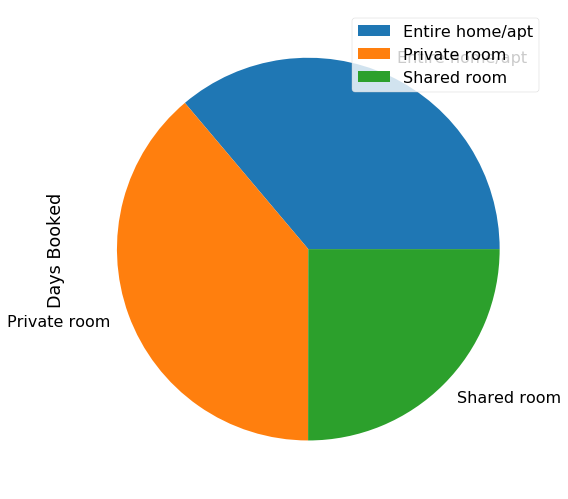

In [17]:
merge_df.plot.pie(y='Days Booked')

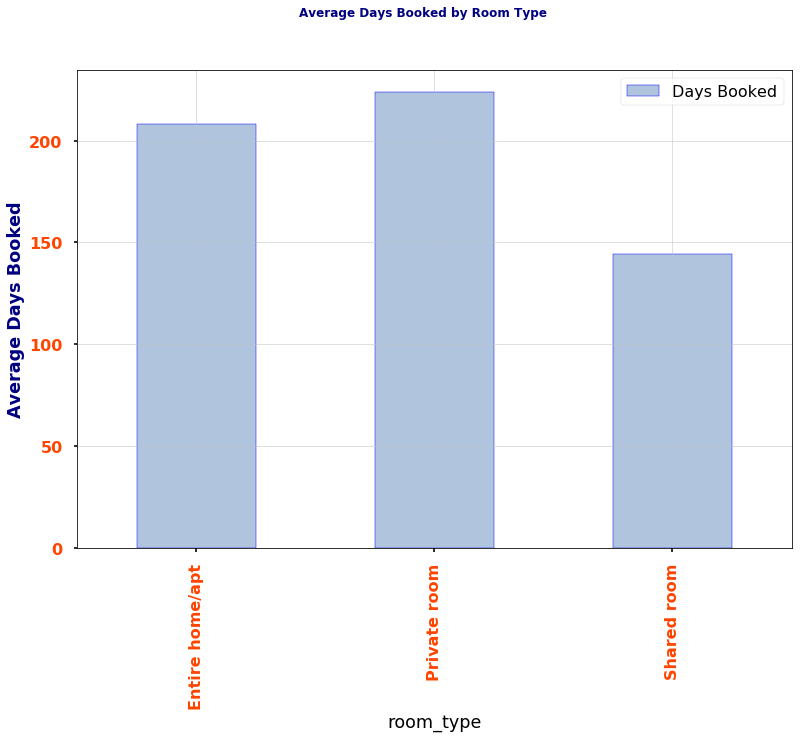

In [18]:
merge_df.plot.bar(y='Days Booked', color='lightsteelblue', edgecolor='blue')

# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Average Days Booked by Room Type', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Average Days Booked", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("AvgDaysBookedbyRoom.png", bbox_inches="tight", transparent=True)

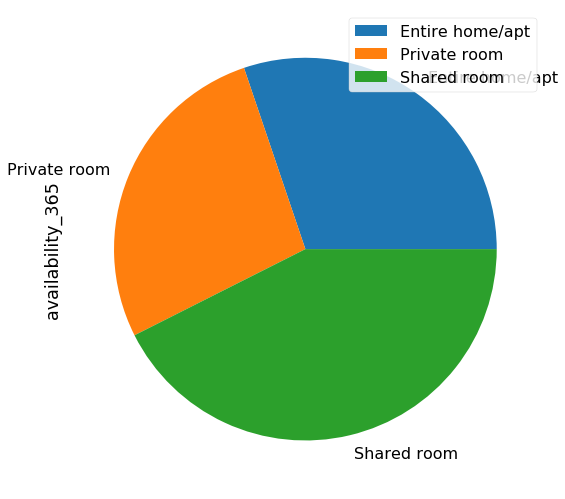

In [19]:
merge_df.plot.pie(y='availability_365')

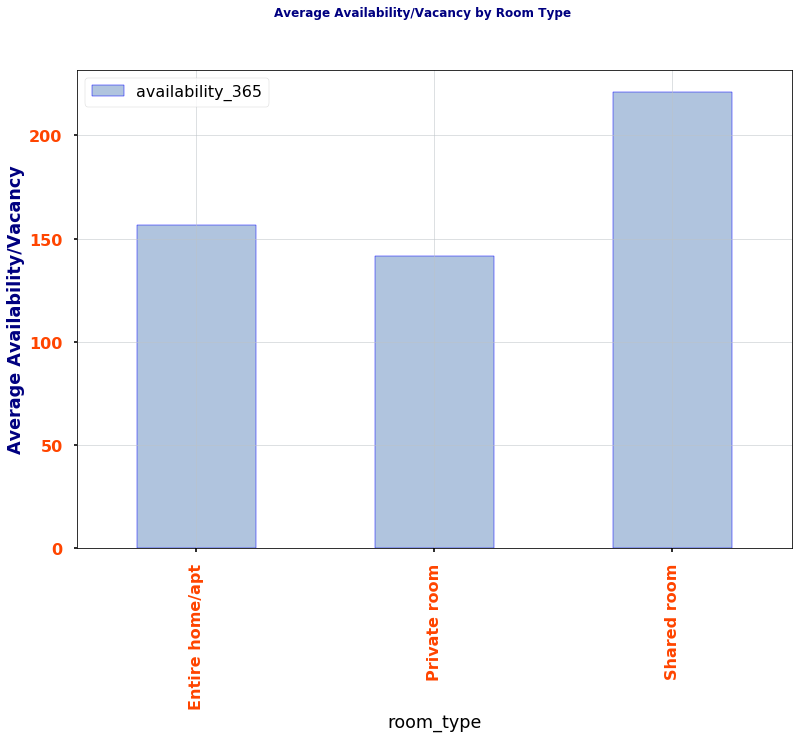

In [20]:
merge_df.plot.bar(y='availability_365', color='lightsteelblue', edgecolor='blue')

# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Average Availability/Vacancy by Room Type', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Average Availability/Vacancy", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("VacancybyRoom.png", bbox_inches="tight", transparent=True)

In [21]:
avg_price = avg_price.reset_index()
avg_price

,room_type,price
0,Entire home/apt,267.234106
1,Private room,141.534900
2,Shared room,84.237885


In [22]:
avg_price.describe()

,price
count,3.000000
mean,164.335631
std,93.604536
min,84.237885
25%,112.886393
50%,141.534900
75%,204.384503
max,267.234106


In [23]:
n_avg_review = pd.DataFrame(sf_airbnb_df.groupby(['neighbourhood']).mean()['number_of_reviews'])
n_avg_review

,number_of_reviews
neighbourhood,
Bayview,45.711864
Bernal Heights,57.401003
Castro/Upper Market,54.905660
Chinatown,9.203125
Crocker Amazon,51.977778
Diamond Heights,88.444444
Downtown/Civic Center,21.586047
Excelsior,56.006135
Financial District,32.124224


In [24]:
n_avg_price = pd.DataFrame(sf_airbnb_df.groupby(['neighbourhood']).mean()['price'])
n_avg_price

,price
neighbourhood,
Bayview,117.807910
Bernal Heights,188.631579
Castro/Upper Market,247.589623
Chinatown,188.960938
Crocker Amazon,134.666667
Diamond Heights,196.888889
Downtown/Civic Center,174.097674
Excelsior,128.453988
Financial District,228.869565


In [25]:
n_merge_df = pd.merge(n_avg_review, n_avg_price, on='neighbourhood', how='left')
n_merge_df.sort_values(by=['price'], ascending=False)
n_merge_df.reset_index()

,neighbourhood,number_of_reviews,price
0,Bayview,45.711864,117.807910
1,Bernal Heights,57.401003,188.631579
2,Castro/Upper Market,54.905660,247.589623
3,Chinatown,9.203125,188.960938
4,Crocker Amazon,51.977778,134.666667
5,Diamond Heights,88.444444,196.888889
6,Downtown/Civic Center,21.586047,174.097674
7,Excelsior,56.006135,128.453988
8,Financial District,32.124224,228.869565
9,Glen Park,54.307692,210.815385


<function matplotlib.pyplot.show(*args, **kw)>

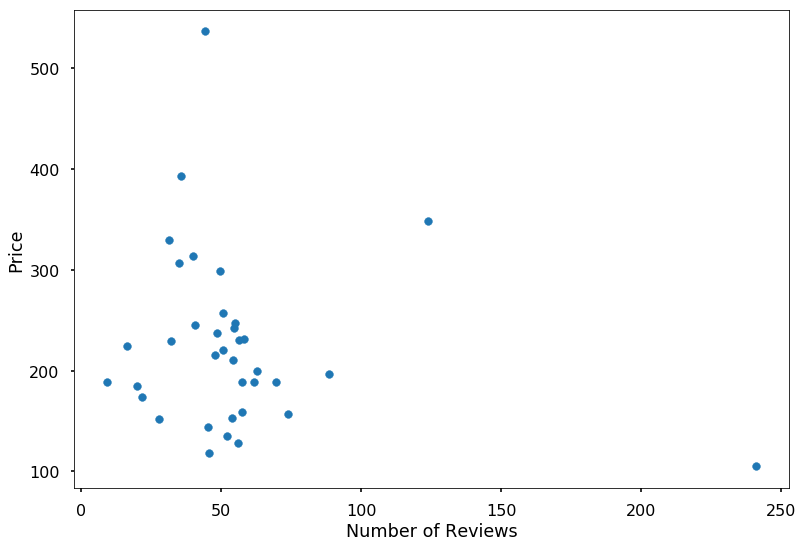

In [26]:
plt.scatter(n_merge_df['number_of_reviews'], n_merge_df['price'], marker='o', s=60)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show

### Redfin MLS San Francisco Data (Current Listings)

Observations: 
1. While Multi-families have higher sale prices, investors and homeowners will pay less per bedroom in multi-family homes
2. Investors and homeowners will pay more per bedroom in Condos/Co-ops

In [27]:
mls_df = pd.read_csv("resources/sfrealestate_72219.csv")

In [28]:
mls_df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,Redfin Data,NaN,Single Family Residential,515 Munich St,San Francisco,CA,94112,925000,3.0,2.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/515-Mun...,Coming Soon,38596,N,Y,37.717422,-122.429239
1,Redfin Data,NaN,Single Family Residential,76 Homestead St,San Francisco,CA,94114,1,4.0,3.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/76-Home...,Coming Soon,38781,N,Y,37.749760,-122.439856
2,Redfin Data,NaN,Condo/Co-op,333 Main St Unit 8F,San Francisco,CA,94105,895000,1.0,1.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/333-Mai...,Coming Soon,39150,N,Y,37.789131,-122.391020
3,MLS Listing,NaN,Vacant Land,886 Moultrie St,San Francisco,CA,94110,2100000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/886-Mou...,San Francisco MLS,441005,N,Y,37.733315,-122.416504
4,MLS Listing,NaN,Vacant Land,202 Union St,San Francisco,CA,94133,500000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/202-Uni...,San Francisco MLS,453033,N,Y,37.801341,-122.402947
5,MLS Listing,NaN,Condo/Co-op,1450 Post St #316,San Francisco,CA,94109,400000,1.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1450-Po...,San Francisco MLS,465790,N,Y,37.786361,-122.425831
6,MLS Listing,NaN,Multi-Family (5+ Unit),285 Turk St,San Francisco,CA,94102,14750000,11.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/285-Tur...,San Francisco MLS,471185,N,Y,37.782710,-122.413806
7,MLS Listing,NaN,Single Family Residential,3225 Ingalls St,San Francisco,CA,94124,799000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/3225-In...,San Francisco MLS,471608,N,Y,37.718662,-122.393133
8,MLS Listing,NaN,Multi-Family (5+ Unit),381 Turk St,San Francisco,CA,94102,7150000,3.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/381-Tur...,San Francisco MLS,473898,N,Y,37.782407,-122.415263
9,MLS Listing,NaN,Condo/Co-op,2000 Washington St #5,San Francisco,CA,94109,17500000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/2000-Wa...,San Francisco MLS,475321,N,Y,37.792936,-122.426463


In [39]:
nRowsRead = None # specify 'None' if want to read whole file

df2 = pd.read_csv('resources/sfrealestate_72219.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'resources/sfrealestate_72219.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 820 rows and 27 columns


In [29]:
mls_df[["PROPERTY TYPE", "BEDS", "PRICE", "LATITUDE", 'LONGITUDE']].head().round(decimals=2)

,PROPERTY TYPE,BEDS,PRICE,LATITUDE,LONGITUDE
0,Single Family Residential,3.0,925000,37.72,-122.43
1,Single Family Residential,4.0,1,37.75,-122.44
2,Condo/Co-op,1.0,895000,37.79,-122.39
3,Vacant Land,NaN,2100000,37.73,-122.42
4,Vacant Land,NaN,500000,37.80,-122.40


In [30]:
mls_avg_price = pd.DataFrame(mls_df.groupby(['PROPERTY TYPE']).mean()['PRICE'].round(decimals=2))
mls_avg_price.reset_index()

,PROPERTY TYPE,PRICE
0,Condo/Co-op,1936481.20
1,Multi-Family (2-4 Unit),2532050.93
2,Multi-Family (5+ Unit),5376813.95
3,Other,2514735.88
4,Single Family Residential,2933186.54
5,Townhouse,1826034.50
6,Vacant Land,1900600.00


In [31]:
mls_bed = pd.DataFrame(mls_df.groupby(['PROPERTY TYPE']).mean()['BEDS'].round(decimals=2))
mls_bed.reset_index()

,PROPERTY TYPE,BEDS
0,Condo/Co-op,1.98
1,Multi-Family (2-4 Unit),5.44
2,Multi-Family (5+ Unit),11.32
3,Other,4.75
4,Single Family Residential,3.61
5,Townhouse,2.71
6,Vacant Land,NaN


In [32]:
mls_merge = pd.merge(mls_avg_price, mls_bed, on='PROPERTY TYPE')
mls_merge.drop(['Vacant Land']) # Dropping Vacant Land

,PRICE,BEDS
PROPERTY TYPE,,
Condo/Co-op,1936481.20,1.98
Multi-Family (2-4 Unit),2532050.93,5.44
Multi-Family (5+ Unit),5376813.95,11.32
Other,2514735.88,4.75
Single Family Residential,2933186.54,3.61
Townhouse,1826034.50,2.71


In [33]:
# Calculates price per bedroom
mls_merge['Price Per Bedroom'] = mls_merge['PRICE']/mls_merge['BEDS']
mls_merge.drop(['Vacant Land', 'Other']).reset_index().style.format({"PRICE": "${:,.2f}", "Price Per Bedroom": "${:,.2f}"})
mls_sort = mls_merge.sort_values(by=['Price Per Bedroom'], ascending=False).drop(['Vacant Land', 'Other'])
mls_sort.style.format({"PRICE": "${:,.2f}", "Price Per Bedroom": "${:,.2f}"})

,PRICE,BEDS,Price Per Bedroom
PROPERTY TYPE,,,
Condo/Co-op,"$1,936,481.20",1.98,"$978,020.81"
Single Family Residential,"$2,933,186.54",3.61,"$812,517.05"
Townhouse,"$1,826,034.50",2.71,"$673,813.47"
Multi-Family (5+ Unit),"$5,376,813.95",11.32,"$474,983.56"
Multi-Family (2-4 Unit),"$2,532,050.93",5.44,"$465,450.54"


In [34]:
type(mls_merge)

pandas.core.frame.DataFrame

In [35]:
mls_drop = mls_merge.sort_values(by=['Price Per Bedroom'], ascending=False).drop(['Vacant Land', 'Other'])
mls_drop

,PRICE,BEDS,Price Per Bedroom
PROPERTY TYPE,,,
Condo/Co-op,1936481.20,1.98,978020.808081
Single Family Residential,2933186.54,3.61,812517.047091
Townhouse,1826034.50,2.71,673813.468635
Multi-Family (5+ Unit),5376813.95,11.32,474983.564488
Multi-Family (2-4 Unit),2532050.93,5.44,465450.538603


In [36]:
type(mls_drop) #Used to Graph dropped data (Other & Vacant Land)

pandas.core.frame.DataFrame

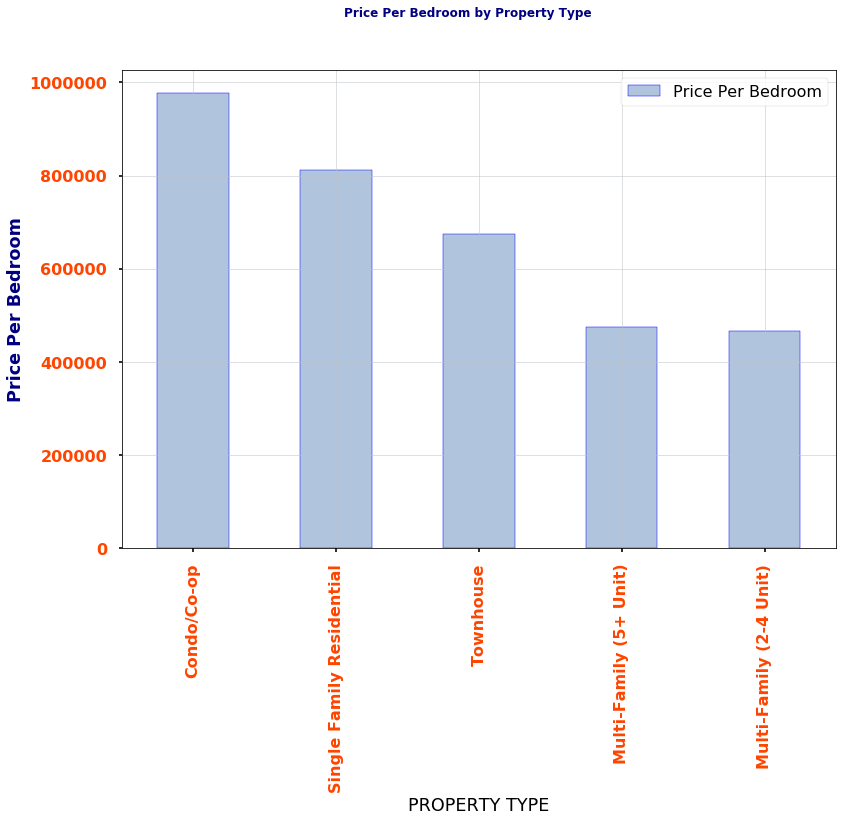

In [37]:
mls_drop.plot.bar(y='Price Per Bedroom', color='lightsteelblue', edgecolor='blue')

# Rotate ticks 90 degrees
plt.xticks(rotation=90, color='orangered', weight='semibold')
plt.yticks(color='orangered', weight='semibold')

# Chart Title
plt.suptitle('Price Per Bedroom by Property Type', fontweight='bold', color='navy')

# Label for y axis
plt.ylabel("Price Per Bedroom", weight='semibold', color='navy')

# Incorporate the other graph properties
# graph grid, light grey in html hex
plt.grid(color='#BDC3C7', linewidth=.50)

#Use built-in style
style.use('seaborn-poster')

# Save Figure
plt.savefig("mlsPricePerBedroom.png", bbox_inches="tight", transparent=True)

## If considering purchasing property for a short term rental, consider purchasing a multi-family home in San Francisco and list it as an entire apartment. 
